In [7]:
import findspark
findspark.init('/home/shenjeffrey/spark/')
import pyspark
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
import seaborn as sns

In [2]:
from P2 import *

In [3]:
# initiate spark
sc = pyspark.SparkContext()

In [20]:
# Declare 2000 pixels
pixels = range(2000)

In [21]:
# declare 10 partitions
data = sc.parallelize(pixels, 10)
# cartesian
data = data.cartesian(data)

In [22]:
# Show that the data rdd now has 100 partitions
print data.getNumPartitions()

100


In [23]:
# Example of the data
data.take(10)

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9)]

In [24]:
# Map the cartesian coordinates as given in the promp
# For the pixel at (i,j), use x = (j/500.0) - 2 and y = (i/500:0) - 2.
data = data.map(lambda (i,j): ((i,j), (j/500.0-2, i/500.0-2)))

In [25]:
# Apply the mandelbot function to each of the cartesian coordinates using mapValue
result = data.mapValues(lambda (x,y): mandelbrot(x,y))

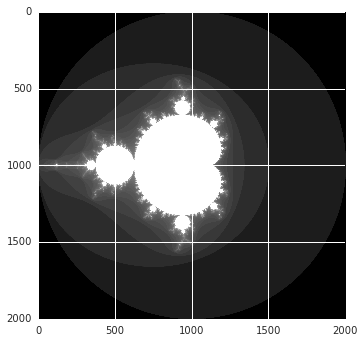

In [26]:
# Draw the image using draw_image
draw_image(result)

In [28]:
# Calculate per-partition work using sum_values_for_partitions function
partition_work = sum_values_for_partitions(result)

In [29]:
# Collect the results
partition_work_result = partition_work.collect()

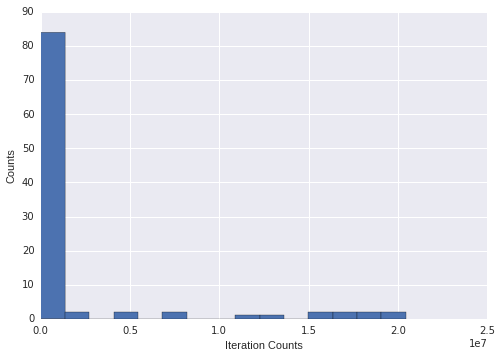

In [34]:
# Plot histogram
plt.hist(partition_work_result, bins=15)
plt.ylabel("Counts")
plt.xlabel("Iteration Counts")
plt.show()